#### Sr. Engineer: Dhruv Singh <br> Project Name: Success Classifier <br> Phase: Modelling - DBSCAN Clustering <br> Date Updated: 01/20/2022

# Chapter 4 - Clustering Models
## Segment 3 - DBSCan clustering to identify outliers

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### DBSCan clustering to identify outliers
#### Train your model and identify outliers

In [3]:
# with this example, we're going to use the same data that we used for the rest of this chapter. So we're going to copy and 
# paste in the code. 
address = "C:/Dhruv/Data/4_Machine_Learning_with_Python/1_Python for Data Science Essential Training Part 2/Phase II - Modelling/2_Clustering_v1_01.20.2022/1_readonly/Services.csv"
df = pd.read_csv(address, header=0, sep=',')

df.columns=['Age_AtReg', 'Disability', 'Gender', 'CitizenStatus', 'EducationLevel', 'Race_Hispanic', 'Race_NativeAmerican', 'Race_Asian', 'Race_AfricanAmerican', 'Race_PacificIslander', 'Race_White', 'Employed']

data = df.iloc[:,0:10].values
target = df.iloc[:,11].values

df[:5]

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,Race_White,Employed
0,40,0,1,1,11,0,0,0,0,0,0,1
1,40,0,1,1,11,0,0,0,0,0,0,1
2,50,0,1,1,14,0,0,0,1,0,0,0
3,50,0,1,1,14,0,0,0,1,0,0,0
4,53,0,1,1,14,0,0,0,1,0,0,0


In [4]:
model = DBSCAN(eps=0.8,  min_samples=19).fit(data)
print(model)                                            

DBSCAN(eps=0.8, min_samples=19)


#### Visualize your results

In [5]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))

print(outliers_df[model.labels_ ==-1])

Counter({-1: 14381, 188: 381, 304: 362, 93: 356, 277: 348, 255: 346, 348: 341, 333: 329, 325: 327, 316: 326, 149: 321, 59: 271, 338: 255, 191: 250, 317: 249, 84: 244, 307: 220, 62: 216, 133: 206, 41: 205, 106: 203, 70: 178, 383: 178, 16: 177, 158: 172, 221: 172, 68: 162, 99: 161, 26: 159, 1: 158, 76: 156, 8: 154, 5: 153, 28: 153, 22: 152, 53: 152, 24: 150, 13: 141, 37: 139, 85: 138, 19: 132, 74: 132, 73: 130, 91: 128, 25: 127, 64: 126, 204: 121, 0: 117, 3: 116, 105: 114, 75: 110, 104: 110, 426: 107, 31: 104, 20: 98, 65: 95, 51: 94, 109: 93, 143: 92, 120: 91, 382: 87, 86: 86, 161: 86, 36: 80, 141: 80, 30: 76, 27: 74, 43: 74, 23: 73, 151: 72, 239: 72, 306: 71, 326: 71, 334: 71, 34: 69, 21: 68, 44: 66, 126: 66, 214: 66, 17: 65, 345: 65, 281: 64, 49: 63, 54: 63, 78: 63, 82: 63, 371: 63, 72: 62, 108: 62, 157: 62, 185: 62, 403: 62, 223: 61, 367: 61, 163: 60, 324: 60, 336: 60, 362: 59, 372: 59, 389: 59, 35: 58, 352: 58, 100: 57, 60: 56, 192: 56, 208: 54, 209: 54, 337: 54, 390: 54, 420: 54, 42

Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

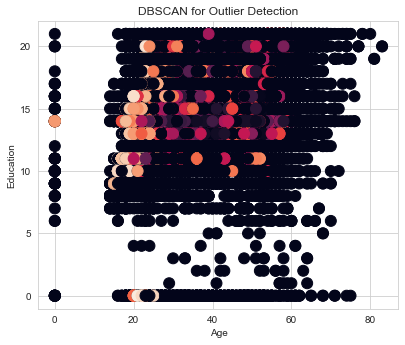

In [6]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

colors = model.labels_

ax.scatter(data[:,0], data[:,4], c=colors, s=120)
ax.set_xlabel('Age')
ax.set_ylabel('Education')
plt.title('DBSCAN for Outlier Detection')